## <span style = "color: green" >Simple Linear Regression (Gold Price Prediction) </span>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('gold_price_usd.csv')
df

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60
...,...,...
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55


In [4]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


In [6]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

In [7]:
df.rename(columns={'USD (AM)': 'Price'}, inplace=True)

In [8]:
df

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60
...,...,...
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55


In [9]:
df.isna().sum()

Date     0
Price    0
dtype: int64

In [10]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### See all the years and Months in our dataset

In [37]:
#Years
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [38]:
#Months
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

#### Create a regression plot with x-axis as years and y-axis as Price

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Year', ylabel='Price'>

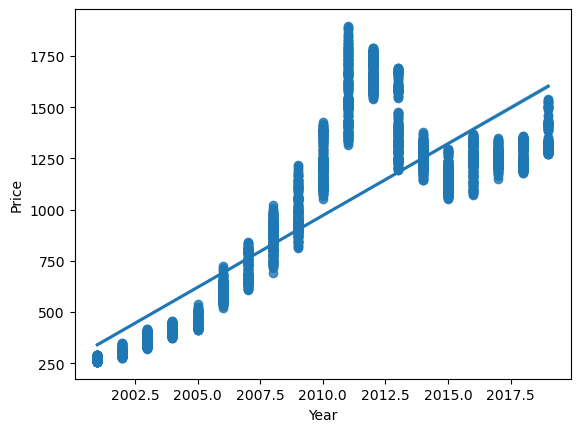

In [46]:
sns.regplot(x = df['Year'] , y = df['Price'])

#### Plot a histplot to find the variation in price

<Axes: xlabel='Price', ylabel='Count'>

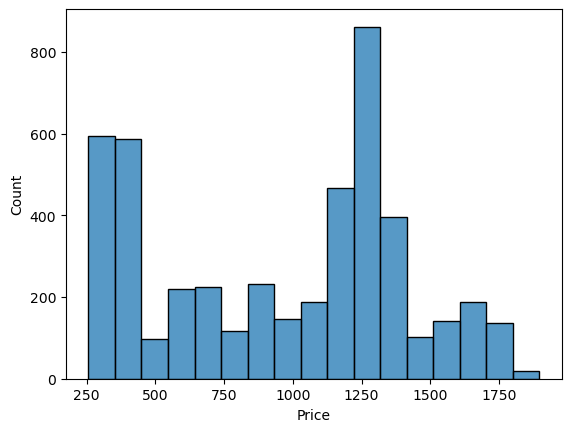

In [47]:
sns.histplot(df['Price'])

#### Assign year and price in x and y variables

In [48]:
X = df[['Year']]
y = df['Price']

#### Split the data into traning and testin set

In [49]:
# import train_test split
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

#### Train Data

In [51]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

#### Create Linear Regression Model

In [52]:
model = LinearRegression()

#### Train the  model

In [53]:
model.fit(X_train,y_train)

LinearRegression()

#### Check the score of our model

In [54]:
model.score(X_train,y_train)

0.7048691960222999

#### Check the coefficient and Intercept

In [58]:
#print the intercept
print(model.intercept_)

-140074.32374779362


In [56]:
#print the coefficent
print(model.coef_)

[70.17366927]


#### Make Prediction with Test data

In [59]:
# Also store the predicted values in a variable
y_pred = model.predict(X_test)

#### Create a new dataframe with actual and predicted values with year(X_test) as index

In [65]:
result_df = pd.DataFrame({'y_test': y_test, 'Prediction': y_pred})

result_df['Year'] = X_test
result_df.set_index('Year', inplace=True)
result_df

,y_test,Prediction
Year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


#### Check the mean absolute error, mean square error

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
# Mean absolute error
mean_absolute_error(y_test, y_pred)

186.24273893873823

In [68]:
# Mean squared error
mean_squared_error(y_test, y_pred)

58032.97376893202

#### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [76]:
years_to_predict = [2025, 2026, 2027, 2028, 2030]
pred = model.predict(pd.DataFrame({'Year': years_to_predict}))
results_df = pd.DataFrame({'Year': years_to_predict, 'Predicted_Price': pred})
results_df

,Year,Predicted_Price
0,2025,2027.356523
1,2026,2097.530192
2,2027,2167.703861
3,2028,2237.877530
4,2030,2378.224869
